In [1]:
# Step 1: Import necessary libraries
import pysam
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# Print a confirmation that the libraries are ready
print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:
# Step 2: Define the input file and extract the data

# NEW, CORRECTED LINE (with the full path):
tagged_bam_file = "/mnt/c/Users/bhanu/R_Python/AAV_Analysis/m84026_231030_220704_s3.tagged.bam"
print(f"Reading BAM file: {tagged_bam_file}...")

# Create an empty list to store the classifications
pacbio_classifications = []

# Open the BAM file for reading
# The 'with' statement ensures it's properly closed after use.
with pysam.AlignmentFile(tagged_bam_file, "rb", check_sq=False) as bamfile:
    
    # Get total reads for the progress indicator
    # This requires the .bai or .pbi index file to be present
    try:
        total_reads = bamfile.count()
    except ValueError:
        total_reads = 0 # If we can't count, the progress bar won't show but the loop will still work
    
    print(f"Processing {total_reads} alignments...")

    # Loop through every read in the file
    for i, read in enumerate(bamfile):
        
        # Print progress every 250,000 reads to show it's working
        if total_reads > 0 and (i + 1) % 250000 == 0:
            progress = (i + 1) / total_reads * 100
            sys.stdout.write(f"\rProgress: {progress:.1f}%")
            sys.stdout.flush()

        # Try to get the AX tag; if a read doesn't have one, skip it
        try:
            classification = read.get_tag('AX')
            pacbio_classifications.append(classification)
        except KeyError:
            continue

# Print a final message to clean up the progress line
sys.stdout.write("\rProcessing complete. All reads processed.\n")
sys.stdout.flush()

print(f"Successfully extracted {len(pacbio_classifications)} classifications.")

Reading BAM file: /mnt/c/Users/bhanu/R_Python/AAV_Analysis/m84026_231030_220704_s3.tagged.bam...
Processing 0 alignments...
Processing complete. All reads processed.
Successfully extracted 2532535 classifications.


In [5]:
# Step 3: Summarize the results with Pandas
print("Summarizing results...")

classifications_series = pd.Series(pacbio_classifications)

# Use value_counts() to get counts and normalize=True to get proportions
results_df = pd.DataFrame(classifications_series.value_counts(normalize=True) * 100)
results_df = results_df.reset_index()

# Rename the columns for clarity
results_df.columns = ['Category', 'Percentage']

# Display the final results table, sorted by percentage
results_df.sort_values(by='Percentage', ascending=False)

Summarizing results...


,Category,Percentage
0,vector-right-partial,35.600574
1,vector-full,35.571354
2,vector-left-partial,15.601917
3,vector-partial,9.233515
4,vector-backbone,1.212658
5,vector-vector+backbone,0.907747
6,repcap-NA,0.822851
7,host-NA,0.511187
8,helper-NA,0.502382
9,NA-NA,0.035814


Generating plot...
Plot successfully saved to: aav_analysis_python_plot.png


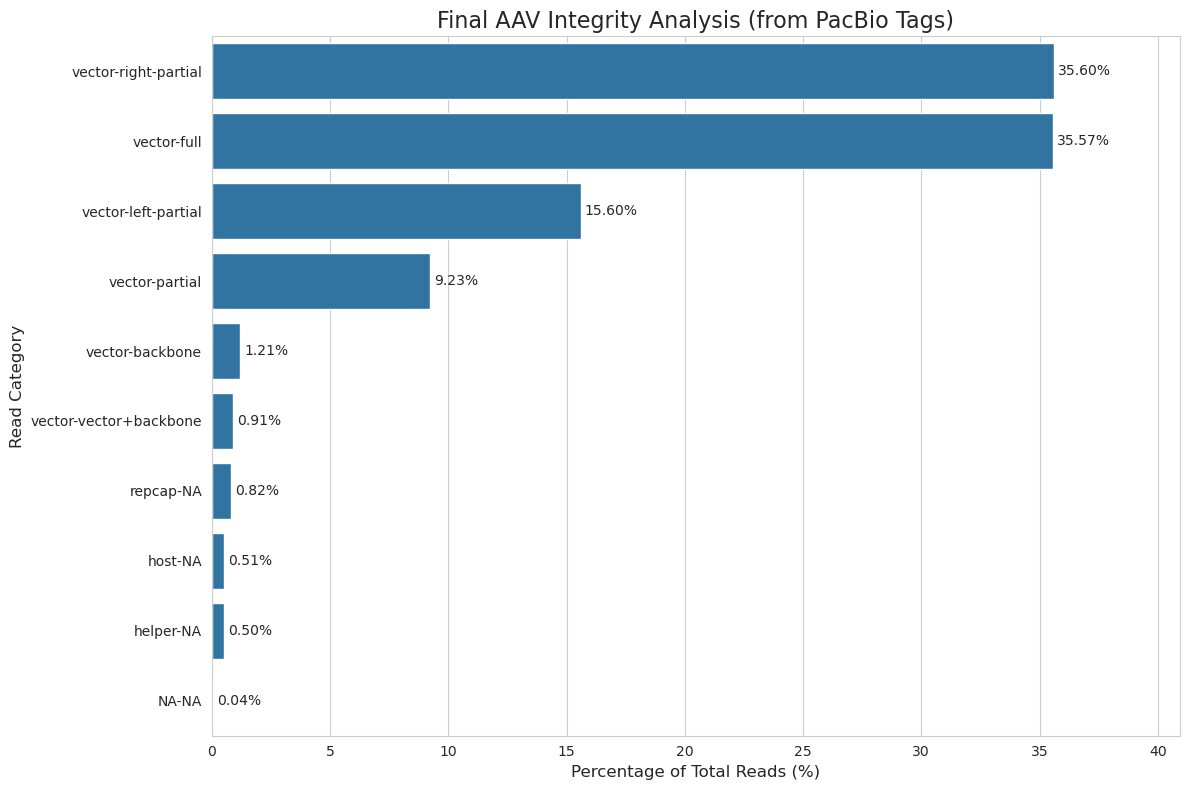

In [6]:
# Step 4: Visualize the results
print("Generating plot...")

# Set the style and figure size for the plot
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Create the bar plot and store it in the 'ax' axes object
# We use the sorted dataframe to ensure the plot is ordered from largest to smallest
ax = sns.barplot(
    x='Percentage',
    y='Category',
    data=results_df.sort_values(by='Percentage', ascending=False)
)

# Use the modern ax.bar_label() to automatically add percentage labels to the bars
ax.bar_label(ax.containers[0], fmt='%.2f%%', padding=3, fontsize=10)

# Set titles and labels for clarity
plt.title('Final AAV Integrity Analysis (from PacBio Tags)', fontsize=16)
plt.xlabel('Percentage of Total Reads (%)', fontsize=12)
plt.ylabel('Read Category', fontsize=12)

# Adjust the x-axis limit to make space for the labels
plt.xlim(0, max(results_df['Percentage']) * 1.15)
plt.tight_layout() # Adjust plot to prevent labels from being cut off

# Save the plot to a file
output_plot_file = 'aav_analysis_python_plot.png'
plt.savefig(output_plot_file, dpi=150)

print(f"Plot successfully saved to: {output_plot_file}")

# The plot will also be displayed below this cell in the Jupyter Notebook